# Université de Limoges
*November 2023*

Faculté des Sciences et Techniques

Département de Mathématiques

# ===============================================================

## =========Master de Mathématiques et applications, parcours ACSYON==========
### ======================Splitting Methods for Convex Optimization===============================
#### ==========================================Homework 2==========================================

### ===========================Cleque Marlain MBOULOU======================================


In [1]:
import numpy as np
from numpy.linalg import inv,norm
import matplotlib.pyplot as plt
import time as time


## Exercise 1

$\textit{Tikhonov regularization problem}$ is the following:
\begin{align}
     \min_{x\in \mathbb{R}^d}\frac{1}{2}||Ax-b||^2 + \frac{\gamma}{2}||x||^2 \texttt{   (1)}
\end{align}
where $A \in \mathbb{R}^ {n\times d}$
is a given matrix (usually with $d >> n$), $b \in \mathbb{R}$
$n $ is a given vector and $\gamma > 0$ is a given nonnegative real number

$\textbf{1}.$The Tikhonov regularization problem is a type of regularized least squares problem used in linear regression and other linear modeling tasks. Its objective is to find a solution vector $\mathbf{x}$ that minimizes the sum of two terms: a data fidelity term and a regularization term. The problem is formulated as $\textbf{(1)}$

Here's the interpretation of the components of the objective:

   - **Data Fidelity Term**: The data fidelity term $\frac{1}{2} \|\mathbf{Ax} - \mathbf{b}\|^2$ measures how well the vector $\mathbf{x}$ fits the given data vector $\mathbf{b}$ when transformed by the matrix $\mathbf{A}$. It's essentially the squared norm of the difference between the linear model $\mathbf{Ax}$ and the observed data vector $\mathbf{b}$. Minimizing this term ensures that the solution $\mathbf{x}$ provides a good fit to the data.

   - **Regularization Term**:  The regularization term $\frac{\gamma}{2} \|\mathbf{x}\|^2$ adds a penalty for the complexity or norm of the solution vector $\mathbf{x}$. It discourages overly complex solutions by adding a cost that grows with the magnitude of $\mathbf{x}$. The parameter $\gamma$ controls the trade-off between the data fitting and regularization terms. A larger $\gamma$ emphasizes regularization more, which leads to solutions with smaller coefficients, effectively discouraging overfitting. Smaller values of $\gamma$, on the other hand, emphasize the data fitting term and result in solutions that closely fit the given data but might be prone to overfitting if the data is noisy or ill-conditioned.


- **Interpretation of** $\gamma$: The parameter $\gamma$ is a regularization hyperparameter. It controls the relative importance of the regularization term in the optimization problem. When $\gamma$ is set to zero, the problem reduces to ordinary least squares (OLS) regression, which can potentially lead to overfitting if $d \gg n$ (i.e., if the number of features or dimensions is much larger than the number of data points). As $\gamma$ increases, the regularization term becomes more influential, encouraging solutions with smaller coefficients (i.e., shrinking the parameter values). This helps prevent overfitting and can improve the model's generalization to new data. The choice of the optimal value for $\gamma$ depends on the specific problem and the trade-off between fitting the data well and controlling the complexity of the model. It is often determined through techniques like cross-validation or other model selection methods.







$\textbf{2}.$ 
- Gradient descent method: Let's check the assumptions of the lecture 2 proprety 5.1
    - $h$ define by: $h\mapsto h(x) = \frac{1}{2}||Ax-b||^2 + \frac{\gamma}{2}||x||^2 $ is  strongly convex differentiable functions because it's the sum of two strongly convex differentiable convex functions, thus $Argmin(f)\ne \emptyset$
    - $\nabla h$ is $L-Lipschitz$ continuous for some $L > 0$:
    
    Let $x,y \in \mathbb{R}$



\begin{align}
     (\nabla h(x) - \nabla h(y)) =  ||(A^T(Ax -b)+\gamma x)  - (A^T(Ay -b)+\gamma y)|| = ||(A^TA(x -y) +\gamma (x -y)  ||\\
     \leq ||A^TA -\gamma Id|| ||x-y|| 
\end{align}
we find $L = ||A^TA -\gamma Id||$

Then, for any $0<\gamma<\frac{2}{L}$, the descent gradient method converges to some point in $Argmin(f)$.


In [2]:
# Gadient Method

def Grad(A,b,x,gamma):
    return A.T@(A@x -b)+gamma*x
def Grad_desc(A,b,gamma,tol = 10**(-5)):
    start_time = time.time()
    n,d = A.shape
    x = np.random.randn(d,1)
    hh = [] # Values of objective function at each iterations
    k = 0
    while  norm(A.T@(A@x-b) + gamma*x)>=tol:
        x = x - lr*Grad(A,b,x,gamma)
        hh.append(1/2*(norm(A@x-b)**2 +gamma*norm(x)**2)) # no
        k = k+1
    end_time = time.time()
    elapsed_time = end_time - start_time
    return hh,k,x,elapsed_time
n = 10
d = 100
A = np.random.randn(n,d)
b = np.random.randn(n,1)
gamma = 100

#Grad_desc(A,b,gamma,0.0001)


elapsed_time:  0.0289914608001709 seconds


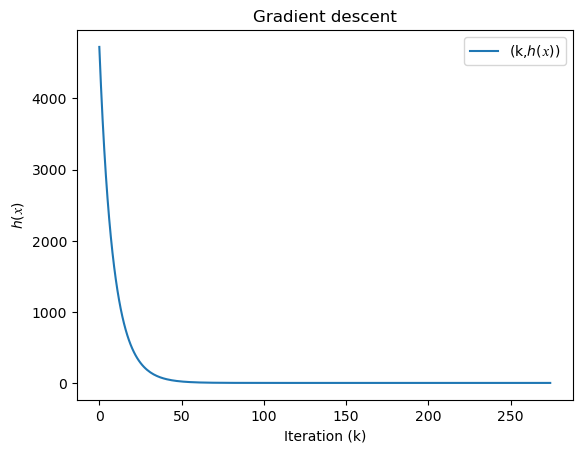

In [3]:
#lr = np.random.uniform(0,1/max(norm(A.T@A),gamma))
lr = np.random.uniform(0,2/norm(A.T@A -gamma*np.identity(d)))
hh1,k,x,elapsed_time = Grad_desc(A,b,gamma,lr)
plt.plot( hh1, label='(k,ℎ($𝑥$))')
plt.title('Gradient descent')
print("elapsed_time: ",elapsed_time,"seconds")
plt.xlabel('Iteration (k)')
plt.ylabel('ℎ($𝑥$)')
plt.legend()
plt.show()

- $\textbf{Proximal point algorithm}$


$f(x) = \frac{1}{2}||Ax -b||^2 + \frac{\gamma}{2}||x||^2$

\begin{equation}
    \texttt{prox}_{\lambda f(x)} = (Id + \lambda\nabla f)^{-1}(x)
\end{equation}
We have: 
\begin{equation}
    y = \texttt{prox}_{\lambda f(x)} = (x + \lambda A^T(Ax -b)+\lambda\gamma x)^{-1}(x)
\end{equation}
We need to have $y$  such that $ (y + \lambda A^T(Ay -b)+\lambda\gamma y) = x \Leftrightarrow \texttt{prox}_{\lambda f(x)} = ((1+\lambda\gamma)Id +\lambda A^TA)^{-1}(x +\lambda A^Tb) $

In [4]:
def prox_point_algo(A,b,gamma,lamda,tol =10**(-5)):
    start_time = time.time()
    n,d = A.shape
    x = np.random.randn(d,1) 
    B = inv((1+lamda*gamma)*np.identity(d) + lamda*A.T@A)
    hh = []
    k = 0
    hh.append(norm(A.T@(A@x-b) + gamma*x))
    while norm(A.T@(A@x-b) + gamma*x)>=tol:
        x = B@(x+lamda*A.T@b)
        hh.append(1/2*(norm(A@x-b)**2 +gamma*norm(x)**2))
        k = k+1
    end_time = time.time()
    elapsed_time = end_time - start_time
    return hh,k,x,elapsed_time
        
    

elapsed_time:  0.020120859146118164 seconds


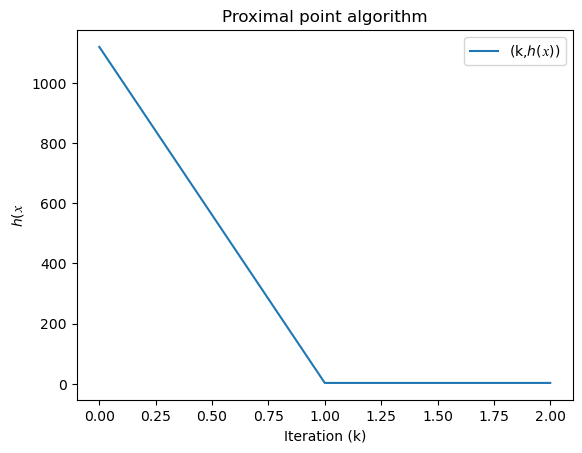

In [5]:
lamda = np.random.uniform(0.001,10)


hh2,k,x,elapsed_time = prox_point_algo(A,b,gamma,100)

plt.plot(hh2, label='(k,ℎ($𝑥$))')
plt.title('Proximal point algorithm')
print("elapsed_time: ",elapsed_time,"seconds")
plt.xlabel('Iteration (k)')
plt.ylabel('ℎ($𝑥$')
plt.legend()
plt.show()

- $\textbf{Proximal gradient algorithm (forward-backward algorithm)}$

Let $f(x) =\frac{1}{2}||Ax-b||^2 \texttt{ and } g(x)  = \frac{\gamma}{2}||x||^2$

\begin{align}
\texttt{prox}_{\lambda f}(x- \nabla g(x)) = (Id +\lambda\nabla f)^{-1}(x- \nabla g(x))=y
\end{align}
Ponsons: $x_1 = x- \lambda\nabla g(x) =(1-\lambda\gamma)x$

we need to find $y$ such that: 
\begin{align}
    (y +\lambda A^T(A  y-b))=x_1 \Leftrightarrow ((Id+\lambda A^TA)y  - \lambda A^Tb)=x_1\\
     \Leftrightarrow y = (Id +\lambda A^TA)^{-1}(x_1 + \lambda A^Tb)
\end{align}
Then $ y = \texttt{prox}_{\lambda f}(x- \nabla g(x)) = (Id +\lambda A^TA)^{-1}((1-\lambda\gamma)x + \lambda A^Tb)$

$\nabla g$  is $\gamma$-Lipschitz , let's take $\lambda = \frac{1}{\gamma}$

In [6]:
# B = (𝐼𝑑+𝜆𝐴^T𝐴)^−1 
def prox_lambda_f(A,C,b,x,lamda):
    return C@(x + lamda*A.T@b)

In [7]:
def prox_gradient_algo(A,b,gamma,lamda,tol = 10**(-5)):
    start_time = time.time()
    n,d = A.shape
    x = np.random.randn(d,1) # Initilization of x
    C = inv(np.identity(d) + lamda*A.T@A) # constante of prox
    hh =[]
    k = 0
    hh.append(norm(A.T@(A@x-b) + gamma*x))
    while norm(A.T@(A@x-b) + gamma*x)>=tol:
        x_1 = (1-lamda*gamma)*x # 𝑥−𝜆∇𝑔(𝑥)
        x = prox_lambda_f(A,C,b,x_1,lamda) # 𝚙𝚛𝚘𝚡𝜆𝑓(𝑥−∇𝑔(𝑥))
        hh.append(1/2*(norm(A@x-b)**2 +gamma*norm(x)**2))
        k+=1
    end_time = time.time()
    elapsed_time = end_time - start_time
    return hh,k,x,elapsed_time 

elapsed_time:  0.0019960403442382812 seconds


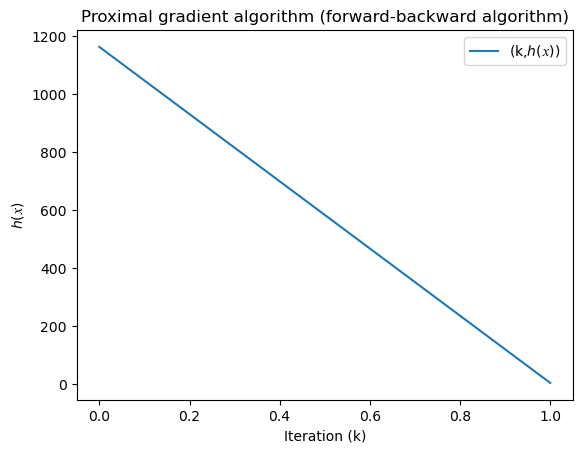

In [8]:
lamda = np.random.uniform(0,2/gamma)
normes3,k,x,elapsed_time = prox_gradient_algo(A,b,gamma,1/gamma)

plt.plot(normes3, label='(k,ℎ($𝑥$))')
plt.title("Proximal gradient algorithm (forward-backward algorithm)")
print("elapsed_time: ",elapsed_time,"seconds")
plt.xlabel('Iteration (k)')
plt.ylabel('ℎ($𝑥$)')
plt.legend()
plt.show()

### Douglas-Rachford algorithm

Let :$y = \texttt{prox}_{\lambda g} (x)= (x+\lambda \nabla g(x))^{-1} $

$(y-\lambda \nabla g(y)) = x \Leftrightarrow (1+\lambda\gamma)y= x \Leftrightarrow y = \frac{1}{1+\lambda\gamma}x$

$$\texttt{prox}_{\lambda g} (x) = \frac{1}{1+\lambda\gamma}x$$
**Note**

In [9]:
def prox_lambda_g(gamma,lamda,x):
    return 1/(1+lamda*gamma)*x

In [10]:
def DRA(A,b,gamma,lamda, ITER = 100, tol = 10**(-5)):
    start_time = time.time()
    n,d = A.shape
    y = np.random.randn(d,1) # initialization of y 
    C = inv(np.identity(d) + lamda*A.T@A) # constante of prox
    hh =[]
    k = 0
    err = 1000*tol
    x = y
    while err>=tol and k<=10**4:
        prox_f = prox_lambda_f(A,C,b,y,lamda)  # 𝚙𝚛𝚘𝚡𝜆𝑔(𝑥)
        y = y + prox_lambda_g(gamma,lamda,2*prox_f-y) - prox_f
        x =  prox_lambda_f(A,C,b,y,lamda)
        hh.append(1/2*(norm(A@x-b)**2 +gamma*norm(x)**2))
        err =  norm(A.T@(A@x-b) + gamma*x)
        k+=1
    end_time = time.time()
    elapsed_time = end_time - start_time
    return hh,k,x,elapsed_time

elapsed_time:  0.15243291854858398 seconds


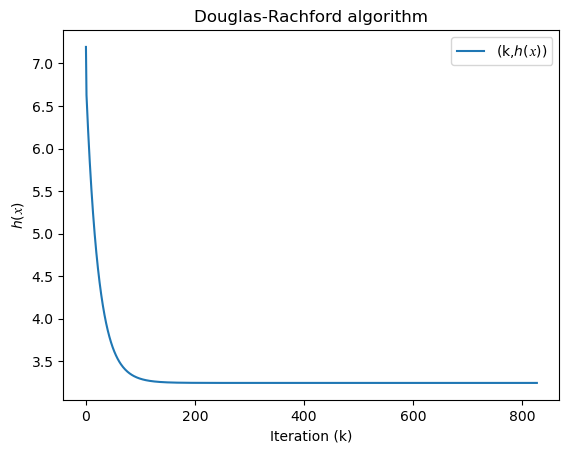

In [11]:
lamda = np.random.uniform(0,2/gamma)
#print(lamda)
tol = 10**(-5)

normes4,k,x,elapsed_time = DRA(A,b,gamma,1, ITER = 100, tol = 10**(-5))

plt.plot( normes4, label='(k,ℎ($𝑥$))')
plt.title('Douglas-Rachford algorithm')
print("elapsed_time: ",elapsed_time,"seconds")
plt.xlabel('Iteration (k)')
plt.ylabel('ℎ($𝑥$)')
plt.legend()
plt.show()

### Comparaison

******************************
Gradient descent
iterations number:  9436
elapsed_time:  0.8570950031280518 seconds
ℎ(𝑥*) =  0.003752330854959676
******************************
Proximal point algorithm
iterations number:  2868
elapsed_time:  0.22579145431518555 seconds
ℎ(𝑥*) =  0.0037519310657287692
******************************
Proximal gradient algorithm
iterations number:  6367
elapsed_time:  0.5606307983398438 seconds
ℎ(𝑥*) =  0.003601499657273947
******************************
Douglas-Rachford algorithm
iterations number:  17
elapsed_time:  0.0 seconds
ℎ(𝑥*) =  0.003601499375123479


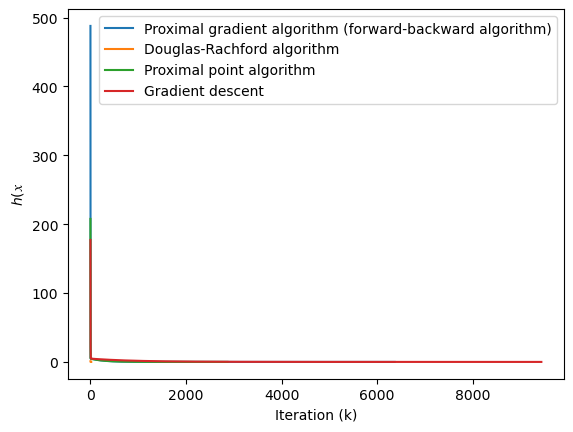

In [12]:
n = 10
d = 100
A = np.random.randn(n,d)
b = np.random.randn(n,1)

#A = np.random.randint(0,10,(n,d))
#b = np.random.randint(0,10,(n,1))
gamma = 0.1

# Gradient decent
lr = np.random.uniform(0,2/norm(A.T@A -gamma*np.identity(d)))
hh1, k1,x1,elapsed_time1 = Grad_desc(A,b,gamma,lr)

# Proximal point algorithm
hh2, k2,x2,elapsed_time2 = prox_point_algo(A,b,gamma,lamda,lr)

# Proximal gradient algorithm
hh3, k3, x3, elapsed_time3 = prox_gradient_algo(A,b,gamma,lamda,tol = 10**(-5))

# Douglas-Rachford algorithm
hh4, k4,x4, elapsed_time4 = DRA(A,b,gamma,1/gamma)
print("*" * 30)
print("Gradient descent")
print("iterations number: ",k1)
print("elapsed_time: ",elapsed_time1,"seconds")
print("ℎ(𝑥*) = ",hh1[-1])
print("*" * 30)
print("Proximal point algorithm")
print("iterations number: ",k2)
print("elapsed_time: ",elapsed_time2,"seconds")
print("ℎ(𝑥*) = ",hh2[-1])
print("*" * 30)
print("Proximal gradient algorithm")
print("iterations number: ",k3)
print("elapsed_time: ",elapsed_time3,"seconds")
print("ℎ(𝑥*) = ",hh3[-1])
print("*" * 30)
print("Douglas-Rachford algorithm")
print("iterations number: ",k4)
print("elapsed_time: ",elapsed_time4,"seconds")
print("ℎ(𝑥*) = ",hh4[-1])

plt.plot( hh3, label='Proximal gradient algorithm (forward-backward algorithm)')
plt.plot( hh4, label='Douglas-Rachford algorithm')
plt.plot(hh2, label='Proximal point algorithm')
plt.plot( hh1, label='Gradient descent')
plt.xlabel('Iteration (k)')
plt.ylabel('ℎ($𝑥$')
plt.legend()
plt.show()


In [13]:
def prox_gradient_algo_2(A,b,B,lamda,tol = 10**(-5)):
    start_time = time.time()
    n,d = A.shape
    x = np.random.randn(d,1)
    C = inv(np.identity(d) + lamda*A.T@A)
    hh =[]
    k = 0
    gamma = B.T@B
    
    while norm(A.T@(A@x-b) + gamma@x)>=tol :
        x_1 = x - lamda*gamma@x
        x = prox_lambda_f(A,C,b,x_1,lamda)
        hh.append(1/2*(norm(A@x-b)**2 +norm(B@x)**2))
        k+=1
    end_time = time.time()
    elapsed_time = end_time - start_time
    return hh,k,x,elapsed_time

******************************
Proximal gradient algorithm
iterations number:  38
elapsed_time:  0.006142139434814453 seconds
******************************


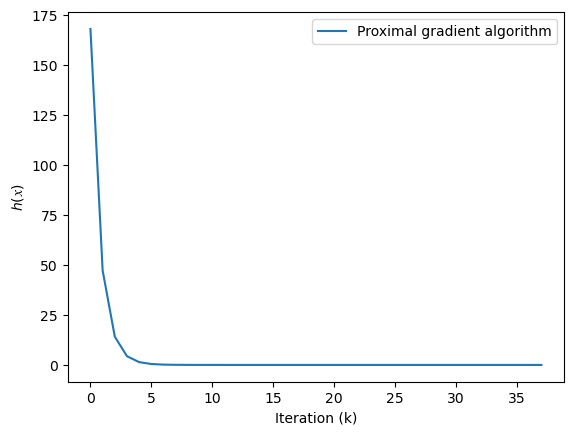

In [14]:
n = 10
m = 5
d = 100
A = np.random.randn(n,d)
B = np.random.randn(m,d)
b = np.random.randn(n,1)
gamma = 100

L = np.linalg.norm(B.T@B)

# Proximal gradient algorithm
hh5, k5,x,elapsed_time = prox_gradient_algo_2(A,b,B,1/gamma)
print("*" * 30)
print("Proximal gradient algorithm")
print("iterations number: ",k5)
print("elapsed_time: ",elapsed_time,"seconds")
print("*" * 30)
plt.plot(hh5, label='Proximal gradient algorithm')
plt.xlabel('Iteration (k)')
plt.ylabel('ℎ($𝑥$)')
plt.legend()
plt.show()


### 5. Generalized Tikhonov Regularization Problem:
$$
\min_{ x \in \mathbb{R}^d } \frac{1}{2} \|Ax - b\|_2^2 + \frac{1}{2} \|Bx\|_2^2 
$$
where $B \in \mathbb{R}^{m \times d}$ is a given matrix.

#### Interpretation

The generalized Tikhonov regularization problem seeks a solution vector $\mathbf{x}$ by balancing two objectives:

- $\textbf{Data Fidelity Term (L2 Norm Term)}$:

$$
\frac{1}{2} \|Ax - b\|_2^2
$$
Measures how well the solution vector $\mathbf{x}$ fits the observed data vector $\mathbf{b}$ when transformed by the matrix $\mathbf{A}$. It ensures a good fit to the data.

- $\textbf{Regularization Term (L2 Norm Term with Matrix}$ $B$):
$$
\frac{1}{2} \|Bx\|_2^2
$$
Introduces regularization by penalizing the magnitude of the solution vector $\mathbf{x}$ with respect to the matrix $\mathbf{B}$. The matrix $\mathbf{B}$ influences the solution, allowing the incorporation of prior knowledge or constraints.

- $\textbf{Interpretation of Matrix}$ $B$:

The matrix $\mathbf{B}$ serves as a regularization operator, guiding the characteristics of the solution. Its interpretation depends on the specific application:

    - Example Interpretation:
In a linear inverse problem, if $\mathbf{B}$ is a discrete gradient operator, it encourages sparsity in the solution. In image processing, $\mathbf{B}$ could represent a blurring operator, promoting smooth solutions.


## Exercise 2

In this exercise, we consider the LASSO (Least Absolute Shrinkage and Selection Operator) problem given by:

$$
\min_{x\in\mathbb{R}^d} \frac{1}{2} \|Ax - b\|^2 + \gamma \|x\|_1 := h(x)
$$

where $A \in \mathbb{R}^{n \times d}$ is a given matrix (usually with $d \gg n$), $b \in \mathbb{R}^n$ is a given vector, and $\gamma > 0$ is a given nonnegative real number.


$\textbf{1. }$The term $\gamma \|\mathbf{x}\|_1$ in the LASSO problem is known as the "sparsity enforcement" term. It encourages sparsity in the solution $\mathbf{x}$ by penalizing the absolute values of its components. As $\gamma$ increases, this term becomes more influential, driving many components of $\mathbf{x}$ to become exactly zero, resulting in a sparse solution. LASSO is valuable for feature selection, as it selects the most important features and sets others to zero, making it suitable for problems where sparsity is desired. In a two-dimensional context, LASSO enforces sparsity by pushing the solution towards the axes, effectively selecting a subset of features and setting others to zero.


$\textbf{2. }$

#### Objective of the LASSO Problem

The LASSO problem combines data fitting and regularization to find a sparse solution to an underdetermined system of linear equations. The objective function consists of two terms:

- $\textbf{Data Fidelity Term}$:$$\frac{1}{2} \|Ax - b\|_2^2$$This term measures how well the solution vector $\mathbf{x}$ fits the observed data vector $\mathbf{b}$ when transformed by the matrix $\mathbf{A}$. It ensures that the solution accurately represents the observed data, similar to the ordinary least squares (OLS) method.

- $\textbf{Regularization Term}$:$$\gamma \|x\|_1$$The regularization term introduces a penalty for the absolute values of the components of $\mathbf{x}$. The parameter $\gamma$ controls the strength of the regularization. Higher $\gamma$ values lead to sparser solutions by encouraging many components of $\mathbf{x}$ to be exactly zero. The term $\|x\|_1$ represents the L1 norm of $\mathbf{x}$, promoting sparsity by shrinking less relevant features toward zero.

- Interpretation of the Parameter $\gamma$:The parameter $\gamma$ plays a crucial role in balancing the trade-off between fitting the data well and promoting sparsity in the solution. The interpretation of $\gamma$ involves considerations of the desired level of sparsity in the solution:

    -  smaller $\gamma$ places less emphasis on sparsity, allowing for a solution that closely fits the data with potentially non-zero coefficients for many features.
    
    - A larger $\gamma$ strongly enforces sparsity, encouraging more coefficients of $\mathbf{x}$ to be exactly zero. This is useful for feature selection, where only a subset of features is deemed relevant.



$\textbf{3. }$Codes to solve LASSO problem

-  $\textbf{Proximal gradient algorithm}$

Let $f: x \mapsto f(x) = \gamma ||x||_1$ and $g: x\mapsto \frac{1}{2}||Ax -b||^2$. $f \in\Gamma_0(\mathbb{R}^n)$ because, $ \gamma||.||_1$ is convex, $\gamma$-lipschitz and proper function

$f(x) = \gamma \|x\|_1 = \sum_{i=1}^{d} |x_i| = \sum_{i=1}^{d} f_i(x_i)$

$\texttt{prox}_{\lambda f}(x) = (\texttt{prox}_{\lambda f_1}(x_1),\dots,\texttt{prox}_{\lambda f_d}(x_d))$

$\texttt{prox}_{\lambda \gamma |.|}(x_i) = \begin{equation}
\left\{
\begin{aligned}
   x_i + \lambda\gamma \texttt{ if } x_i\le -\lambda\gamma\\
   0 \texttt{ if } |x_i| \le \lambda\gamma \\
   x_i - \lambda\gamma \texttt{ if } x_i\ge \lambda\gamma
\end{aligned}
\right.
\end{equation}
\texttt{ and } \nabla g(x) = A^T(Ax -b)
$




In [15]:
def norme1(x):
    return sum(abs(x[i]) for i in range(len(x)))

# Compute th prox of function f given gamma and x
def proxff(x,gamma):
    prox = np.zeros(x.shape)
    for i in range (len(x)):
        if x[i]<= -gamma:
            prox[i] = x[i] + gamma
        elif abs(x[i])<= gamma:
            prox[i] = 0
        else:
            prox[i] = x[i] - gamma
    return prox

In [16]:
def prox_gradient_algo_3(A,b,lamda,gamma,ITER = 10**(4)):
    start_time = time.time()
    n,d = A.shape
    x = np.random.randn(d,1)
    hh =[]
    k = 0 # iteration counter
    hh.append((1/2*norm(A@x-b)**2 +gamma*norme1(x))[0])
    while k<ITER :
        k+=1
        x_1 = x - lamda*A.T@(A@x-b) # 𝑥−𝜆∇𝑔(𝑥)
        x = proxff(x_1,lamda*gamma)
        hh.append((1/2*norm(A@x-b)**2 +gamma*norme1(x))[0])
    end_time = time.time()
    elapsed_time = end_time - start_time   
    return hh,k,x,elapsed_time

******************************
Proximal gradient algorithm
iterations number:  100
elapsed_time:  0.17659735679626465 seconds
******************************


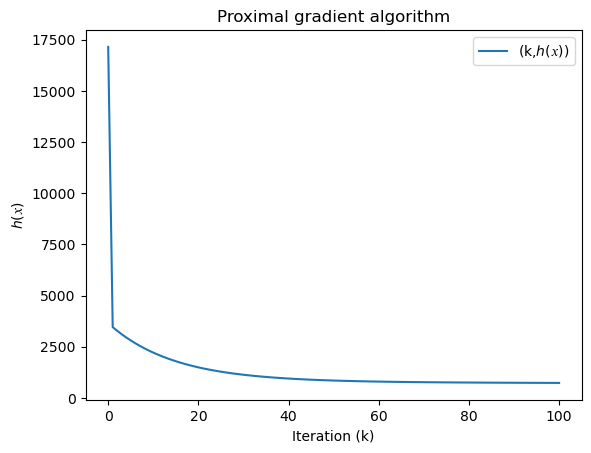

In [17]:
n = 10
m = 5
d = 100
A = np.random.randint(0,10,(n,d))
b = np.random.randint(0,10,(n,1))
gamma = 10
L = norm((A.T@A))

# Proximal gradient algorithm
hh6, k6,x,elapsed_time= prox_gradient_algo_3(A,b,1/L,gamma,100)
#print(normes6)
print("*" * 30)
print("Proximal gradient algorithm")
print("iterations number: ",k6)
print("elapsed_time: ",elapsed_time,"seconds")
print("*" * 30)
plt.plot( hh6, label='(k,ℎ($𝑥$))')
plt.title("Proximal gradient algorithm")
plt.xlabel('Iteration (k)')
plt.ylabel('ℎ($𝑥$)')
plt.legend()
plt.show()

- $\textbf{Douglas-Rachford algorithm}$


Let $g(x) =\frac{1}{2}||Ax-b||^2 \texttt{ and } f(x)  = \gamma||x||_1$


Let: $x_1 = x- \lambda\nabla g(x) =x - A^T(Ax -b) $

$\texttt{prox}_{f}(x) = (\texttt{prox}_{f_1}(x_1),\dots,\texttt{prox}_{f_d}(x_d))$

$\texttt{prox}_{\lambda\gamma |.|}(x_i) = \begin{equation}
\left\{
\begin{aligned}
   x_i + \lambda\gamma \texttt{ if } x_i\le -\lambda\gamma\\
   0 \texttt{ if } |x_i| \le \lambda\gamma \\
   x_i - \lambda\gamma \texttt{ if } x_i\ge \lambda\gamma
\end{aligned}
\right.
\end{equation}
\texttt{ and } \nabla g(x) = A^T(Ax -b)
$


$\texttt{prox}_{\lambda g}(x) = (Id +\lambda A^TA)^{-1}(x + \lambda A^Tb)$ 

In [18]:
def DRA2(A,b,gamma,lamda,ITER = 10**(3)):
    start_time = time.time()
    n,d = A.shape
    y = np.random.randn(d,1)
    hh =[]
    k = 0
    #delta = 10**6*tol
    x =  y
    hh.append((1/2*norm(A@x-b)**2 +gamma*norme1(x))[0])
    while k<ITER: 
        k+=1
        x =  proxff(y,gamma*lamda)
        y = y + inv(np.identity(d) +lamda*A.T@A)@(2*x -y + lamda*A.T@b) - x
        hh.append((1/2*norm(A@x-b)**2 +gamma*norme1(x))[0])
    end_time = time.time()
    elapsed_time = end_time - start_time
    return hh,k,x,elapsed_time

******************************
Douglas-Rachford algorithm
iterations number:  1000
elapsed_time:  2.846874475479126 seconds
******************************


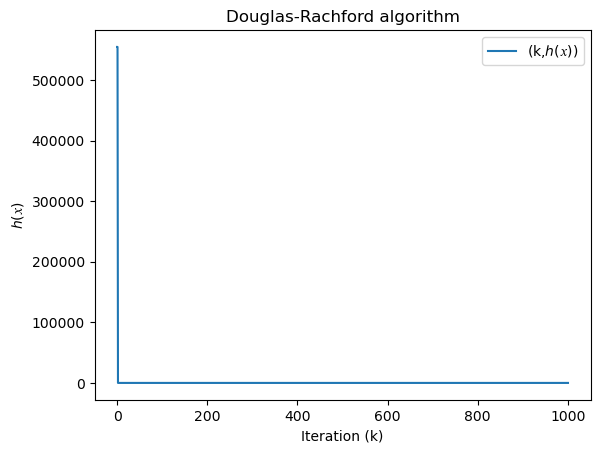

In [19]:
n = 10
d = 100
ITER = 2*10**(3)
A = np.random.randint(-100,100,(n,d))
b = np.random.randint(-100,100,(n,1))
gamma = 10

L = norm(A.T@A)

hh7,k7,x,elapsed_time = DRA2(A,b,1/L,gamma)
print("*" * 30)
print("Douglas-Rachford algorithm")
print("iterations number: ",k7)
print("elapsed_time: ",elapsed_time,"seconds")
print("*" * 30)
plt.plot( hh7, label='(k,ℎ($𝑥$))')
plt.title("Douglas-Rachford algorithm")
plt.xlabel('Iteration (k)')
plt.ylabel('ℎ($𝑥$)')
plt.legend()
plt.show()

#### 4. Bonus: compare the convergence rates of the two codes

******************************
Proximal gradient algorithm
iterations number:  5000
elapsed_time:  9.494269371032715 seconds
ℎ(𝑥0) =  3596.6875767745887
ℎ(𝑥*) =  58.085960761800344
******************************
Douglas-Rachford algorithm
iterations number:  5000
elapsed_time:  17.930567502975464 seconds
ℎ(𝑥*) =  60.727962316181376


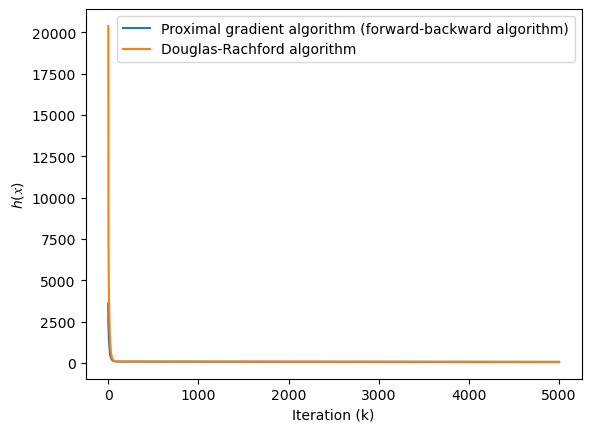

In [20]:
n = 10
d = 100
ITER = 5*10**(3)
A = np.random.randint(0,10,(n,d))
b = np.random.randint(0,10,(n,1))
gamma = 1

L = norm(A.T@A)
# Proximal gradient algorithm
hh3, k3,x3,elapsed_time3 = prox_gradient_algo_3(A,b,1/L,gamma,ITER)
# Douglas-Rachford algorithm
hh4, k4,x4,elapsed_time4 = DRA2(A,b,gamma,1/L,ITER)
print("*" * 30)
print("Proximal gradient algorithm")
print("iterations number: ",k3)
print("elapsed_time: ",elapsed_time3,"seconds")
print("ℎ(𝑥0) = ",hh3[0])
print("ℎ(𝑥*) = ",hh3[-1])
print("*" * 30)
print("Douglas-Rachford algorithm")
print("iterations number: ",k4)
print("elapsed_time: ",elapsed_time4,"seconds")
#print(normes4)
print("ℎ(𝑥*) = ",hh4[-1])

plt.plot( hh3, label='Proximal gradient algorithm (forward-backward algorithm)')
plt.plot( hh4, label='Douglas-Rachford algorithm')
plt.xlabel('Iteration (k)')
plt.ylabel('ℎ($𝑥$)')
plt.legend()
plt.show()


$\textbf{5.}$ Generalized LASSO problem can be formulated as follows:
$$
\min_{x\in\mathbb{R}^d} \frac{1}{2} \|Ax - b\|^2 + \|Bx\|_1,
$$

where $A \in \mathbb{R}^{n \times d}$ is a given matrix, $b \in \mathbb{R}^n$ is a given vector, $x \in \mathbb{R}^d$ is the vector of variables to be optimized, and $B \in \mathbb{R}^{m \times d}$ is another given matrix.

Let $g: x \mapsto g(Bx) =  ||Bx||_1 $  and $f: x\mapsto \frac{1}{2}||Ax -b||^2$. $f,g \in\Gamma_0(\mathbb{R}^n)$ 
One idea is to rewrite the problem as follows:

$$\min_{(x, y) \in \mathbb{R}^{d+m}} h(x, y) + \delta_C(x, y),$$

Where $h\in\Gamma_0(\mathbb{R}^{m+d})$ is defined by $h(x, y) := f(x) + g(y)$ for all $(x, y) \in \mathbb{R}^{d+m}$ and $C := \{(x, y) \in \mathbb{R}^{d+m} \,|\, Bx = y\}$ is an affine subset of $\mathbb{R}^{m+d}$. Then, one can apply a Douglas-Rachford algorithm on this new problem. Indeed:



- Since $h$ is a separable function, we have $\texttt{prox}_{\lambda h} = (\texttt{prox}_{\lambda f},\texttt{prox}_{\lambda g})$ 

$C := \{ (x,y)\mathbb{R}^{d+m} | Bx = y\}$ $  \Leftrightarrow C = \{ (x,y)\mathbb{R}^{d+m} | (B  | -Id)(x,y)^T = 0_{\mathbb{R}^{m}} \Leftrightarrow Mu = 0\}    $ 

with $M = (B | -Id) $ and $u =(x,y)^T $

- Furthermore, $\texttt{proj}_C (x) = u - M^T(MM^T)^{-1}Mu $ 



$\texttt{prox}_{\lambda g}(y) = (\texttt{prox}_{\lambda f_1}(y_1),\dots,\texttt{prox}_{\lambda f_d}(y_d))$


$\texttt{prox}_{\lambda f}(x) = (Id +\lambda A^TA)^{-1}(x + \lambda A^Tb)$ 


$\texttt{prox}_{\lambda |.|}(y_i) = \begin{equation}
\left\{
\begin{aligned}
   y_i + \lambda \texttt{ if } y_i\le -\lambda\\
   0 \texttt{ if } |y_i| \le \lambda \\
   y_i - \lambda \texttt{ if } y_i\ge -\lambda
\end{aligned}
\right.
\end{equation}
$
where $y_i = <B_i,x>$

$\nabla g$ is $||A^TA||$ -lipschitz function


In [22]:
def proj_C(u,M):
    return u-M.T@inv(M@M.T)@M@u

In [23]:
def DRA3(A,b,B,lamda,ITER = 10**(3), tol = 10**(-6)):
    start_time = time.time()
    n,d = A.shape
    m,d = B.shape
    #z_d = np.random.randn(d,1)
    #z_m = np.random.randn(m,1)
    z_d = np.random.randint(0,10,(d,1))
    z_m = np.random.randint(0,10,(m,1))
    z = np.concatenate((z_d, z_m), axis=0)
    C = inv(np.identity(d) + lamda*A.T@A)
    normes =[]
    k = 0
    M  = np.concatenate((B, -np.identity(m)), axis=1)
    normes.append((1/2*norm(A@z[:d]-b)**2 +norme1(B@z[:d]))[0])
    for i in range(ITER)  :
        x = C@(z[:d]+lamda*A.T@b)
        y = proxff(z[d:d+m],lamda) # proxff of th previous question but replace f by g
        u = np.concatenate((x, y), axis=0)
        z = z + proj_C(2*u-z,M) - u
        normes.append((1/2*norm(A@x-b)**2 +norme1(B@x))[0])
        k+=1
    end_time = time.time()
    elapsed_time = end_time - start_time
    return normes,k,x,elapsed_time

******************************
Douglas-Rachford algorithm
ℎ(𝑥0) =  16075166.0
ℎ(𝑥*) =  5.961453553079736e-12
iterations number:  2000
elapsed_time:  1.1108202934265137 seconds
******************************


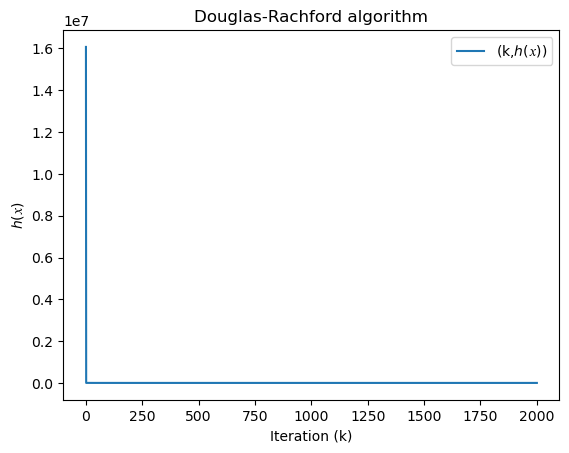

In [24]:
n = 10
m = 5
d = 100
ITER = 2*10**(3)
A = np.random.randint(0,10,(n,d))
b = np.random.randint(0,10,(n,1))
B = np.random.randint(0,10,(m,d))

#A = np.random.randn(n,d)
#B = np.random.randn(m,d)
#b = np.random.randn(n,1)

L = norm(A.T@A)

# Proximal gradient algorithm
hh, k,x,elapsed_time= DRA3(A,b,B,1,ITER)
#print(normes6)
print("*" * 30)
print("Douglas-Rachford algorithm")
print("ℎ(𝑥0) = ",hh[0])
print("ℎ(𝑥*) = ",hh[-1])
print("iterations number: ",k)
print("elapsed_time: ",elapsed_time,"seconds")
print("*" * 30)
plt.plot(hh, label='(k,ℎ($𝑥$))')
plt.title("Douglas-Rachford algorithm")
plt.xlabel('Iteration (k)')
plt.ylabel('ℎ($𝑥$)')
plt.legend()
plt.show()

In [25]:
min(hh)

7.460698725912743e-13

$\textbf{6.}$ The generalized LASSO problem is formulated as follows:

$$
\min_{x \in \mathbb{R}^d} \frac{1}{2}\|Ax - b\|_2^2 + \lambda\|Bx\|_1
$$

Here:
- $ A$ is a given matrix of size $ m \times d $.
- $ B$ is another given matrix of size $m \times d$.
- $ x $ is the optimization variable.
- $ b $ is the target vector.
- $ \lambda $is a regularization parameter controlling the strength of the sparsity-inducing term.

### Objective

The objective of the generalized LASSO problem is to find a sparse solution $ x $ that minimizes the residual error $ \|Ax - b\|_2^2 $ while promoting sparsity in the transformed space $ Bx $ through the $ \ell_1 $-norm regularization term $ \|Bx\|_1 $. The regularization parameter $\lambda $ balances the trade-off between fitting the data and promoting sparsity.

### Interpretation of Matrix $ B $

Matrix $B $ plays a crucial role in shaping the sparsity pattern of the solution. It acts as a linear transformation on the original variable $  x $ before applying the $ \ell_1 $-norm regularization. The choice of $ B $ influences which components of the variable $ x $ are penalized more, promoting sparsity in a specific transformed space.

$\textbf{Example:}$ Linear Regression with Feature Selection

Consider a linear regression problem where $ y $ is the target variable, and $ x $ is the feature vector. Matrix $ A $ represents the original features, and matrix $ B $ is a transformation matrix that defines a new set of features. The objective is to find a sparse solution in the transformed feature space, promoting feature selection.

For instance, if $ B $ is constructed to represent a particular basis transformation or encoding, the generalized LASSO can be used to discover a sparse set of features that are relevant for predicting the target variable.


## Exercise 3

The convex optimization problem for image deblurring is formulated as:

\begin{equation}
\min_{ x \in [0, 255]^{100}} \quad \frac{1}{2} \|x - b\|^2 + \gamma \|F x\|_1
\end{equation}

where $\gamma > 0$ is a nonnegative parameter and $F \in \mathbb{R}^{200\times100}$ is the Total Variation (TV) matrix constructed such that for any $x \in [0, 255]^{100}$:

\begin{equation}
\|F x\|_1 = \sum_{i=1}^{100} \left| x_i - x_{ho(i)} \right| + \left| x_i - x_{ve(i)} \right|
\end{equation}

In the summation above:
- If the index $i \in \{1, \ldots, 100\}$ corresponds to a pixel that does not belong to the last row of pixels or the last column of pixels, then $ho(i)$ corresponds to the pixel located just to the right of $i$, and $ve(i)$ to the pixel located just below $i$.
- If the index $i$ corresponds to a pixel in the last row of pixels, then $ve(i) = i$.
- If the index $i$ corresponds to a pixel in the last column of pixels, then $ho(i) = i$.

$\textbf{1. }$ The blurred image

In [26]:
#from PIL import Image
#import imageio

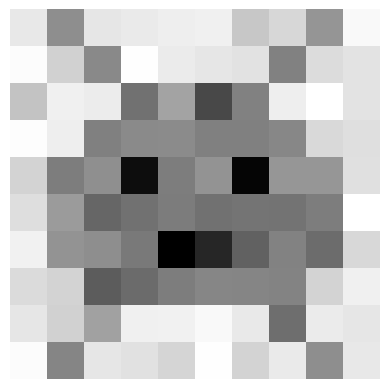

In [27]:
#b = imageio.imread('Practical_work2/blurred.jpg')
blurred= plt.imread('Practical_work2/blurred.jpg')
plt.imshow(blurred, cmap = 'gray')
plt.axis("off")
plt.show()


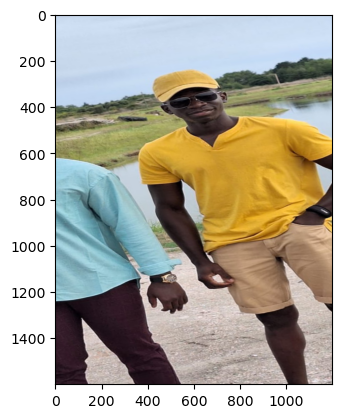

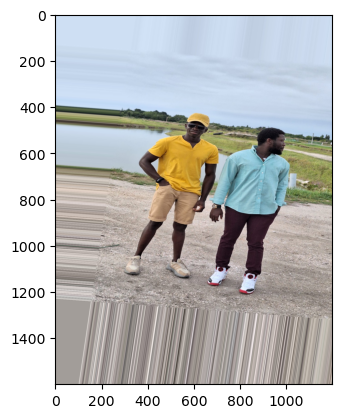

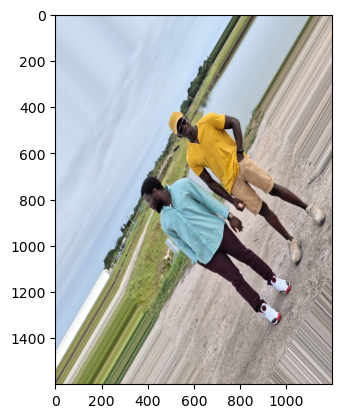

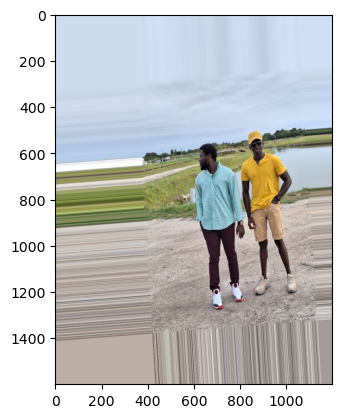

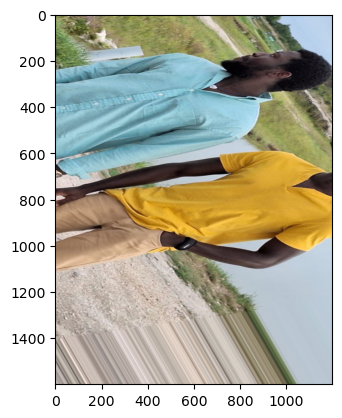

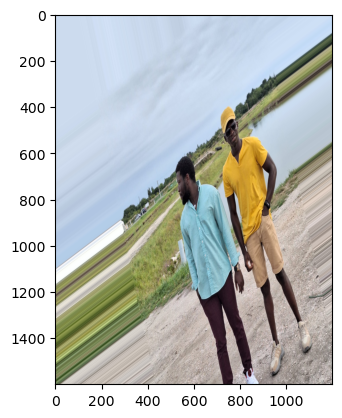

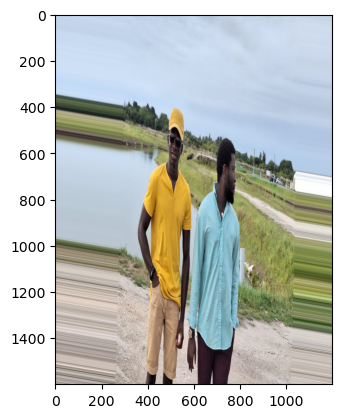

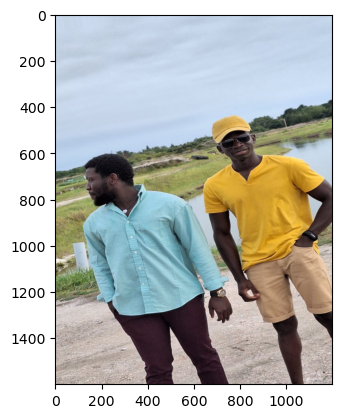

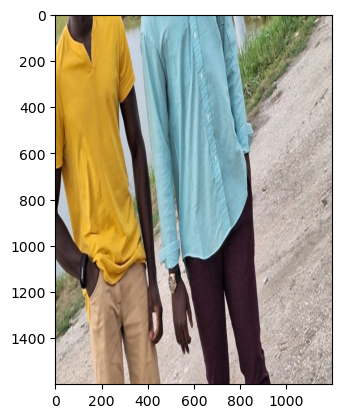

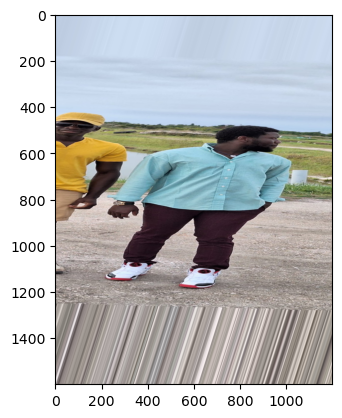

In [45]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import os

# Define the path to your dataset
data_path = 'Practical_work2/cleque.jpeg'

# Create an ImageDataGenerator instance with augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=80,
    width_shift_range=0.1,
    height_shift_range=0.2,
    shear_range=0.9,
    zoom_range=0.8,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Choose an image from your dataset
img_path = os.path.join(data_path, 'Practical_work2/blurred.jpg')
img = plt.imread(data_path)

# Convert the image to a NumPy array
x = image.img_to_array(img)

# Reshape the array to (1, 150, 150, 3) as the generator expects batches
x = x.reshape((1,) + x.shape)

# Generate augmented images and visualize them
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]),cmap=  'gray')
    i += 1
    if i % 10 == 0:  # Generate and show four augmented images
        break

plt.show()


In [46]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow.keras import layers

In [47]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [55]:
#plt.figure(figsize=(1400, 120))
for i in range(9):
  augmented_image = data_augmentation(img)
  #ax = plt.subplot(3, 3, i + 1)
  plt.imshow(augmented_image[0])
  plt.axis("off")

$\textbf{2. }$ Suppose we have a 3x3 image, and each pixel is labeled with an index $i$:



|   |   |   |
|---|---|---|
| 1 | 2 | 3 |
| 4 | 5 | 6 |
| 7 | 8 | 9 |


Let's apply the conditions:

For pixels that do not belong to the last row or last column:

- $ho(i)$ corresponds to the pixel located just to the right of pixel  $i$.

- $ ve(i)$  corresponds to the pixel located just below pixel  $i$.


For pixels belonging to the last row:
$ve(i) = i$.


For pixels belonging to the last column:
$
ho(i) = i.
$

Let's apply these conditions:

|  For pixel | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 |
|------------|---|---|---|---|---|---|---|---|---|
| $ho(i)$    | 2 | 3 | 3 | 5 | 6 | 6 | 8 | 9 | 9 |
| $ve(i)$| 5 | 4 | 5 | 6 | 4 | 5 | 6 | 7 | 8 | 9 |


This example illustrates the spatial relationships between pixels based on the given conditions.


$\textbf{3. }$ The given convex optimization problem is suitable for deblurring the image because it incorporates two essential components:

$\textbf{Data Fidelity Term }$  $(\frac{1}{2} ||x - b||^2):$ This term measures how well the vector $x$ (representing the deblurred image) fits the observed blurred image vector $b$. Minimizing this term ensures that the deblurred image closely matches the observed image.

$\textbf{Regularization Term}$ ($\gamma ||\mathbf{F}x||_1$): This term encourages sparsity in the solution $x$ by promoting Total Variation (TV) regularization. TV regularization is a well-known technique in image processing for denoising and deblurring. It encourages piecewise smoothness in the image by penalizing sharp transitions. The matrix $\mathbf{F}$ encodes the TV regularization, and $\gamma$ controls the trade-off between data fidelity and sparsity regularization.

$\textbf{4. }$
$
\begin{equation*}
F =
\begin{bmatrix}
    1& -1 &        &        &        &        &        &    &    &\dots\\
           & 1 & -1 &        &        &        &        &    &    &\dots\\
           &        & \ddots & \ddots &        &        &        &    &    &\dots\\
           &        &        & \ddots & \ddots &        &        &    &    &\dots\\
           &        &        &        & \ddots & \ddots &        &    &    &\dots\\
           &        &        &        &        & \ddots & \ddots &    &    &\dots\\
           &        &        &        &        &        & \ddots &  \ddots  &    &\dots\\
           &        &        &        &        &        &        &  \ddots &  \ddots   &\dots\\
           0& 0       &  0      &     0   &  0      &  0      &0  & 0   &  0  & 0\dots\\ 
           1&  &        &        &        &        &        &    &    &\dots\\
           & 1 & &        &        &        &        &    &    &\dots\\
           &        & 1 & \ddots &        &        &        &    &    &\dots\\
           &        &        & \ddots & \ddots &        &        &    &    &\dots\\
           &        &        &        & 1 & \ddots &        &    &    &\dots\\
           &        &        &        &        & \ddots & \ddots &    &    &\dots\\
           &        &        &        &        &        & 0 &  0  &    &\dots\\
           &        &        &        &        &        &        &  0 &  0   &\\
           0& 0       &  0      &     0   &  0      &  0      &0  & 0   &  0  & 0\\ 
\end{bmatrix}
\end{equation*}
$

$\textbf{Explanation:}$


The total variation matrix $F$ has dimensions $(200, 100)$.

The function initializes $F$ as a matrix of zeros.

It then iterates through the matrix, filling it according to the specified conditions:

- If the current column index ($j$) is not at the end of a row and the row index ($i$) is less than $100$, it adds elements to create the differences between adjacent pixel values in the same row.To complete the 100 first rows of the matrix F which represente in $||Fx||_1$, $\sum_{i =1}^{100}|x_i - x_{ho(i)}|$

The iteration continues, and if $j$ reaches the end of a row ($100$), it resets $j$ to 0.

- If the row index ($i$) is greater than or equal to $n$ and the sum of the current column index ($j$) and $10$ is less than $100$, it adds elements to create the differences between pixel values in different rows.To complete the 100 last rows of the matrix F which represente in $||Fx||_1$, $\sum_{i =101}^{200}|x_i - x_{ve(i)}|$

The resulting matrix $F$ has entries that represent the differences between adjacent pixel values in the image, both horizontally and vertically.


In [28]:
m,d = b.shape
def build_F(n,d):
    F = np.zeros((2*n,n))
    j=0
    for i in range(0,2*n):
        if (j+1)%d!=0 and  i<n:
            F[i,j] = 1
            F[i,j+1] = -1
        if i>=n and j+d<n:
            F[i,j] = 1
            F[i,j+d] =-1
        j = j+1 
        if j == n:
            j = 0       
    return F


$\textbf{5. }$ Rewriting the problem as:

$$\min_{(x, y) \in \mathbb{R}^{100} \times \mathbb{R}^{200}} f(x, y) + g(x, y) + h(x, y)$$

where:


- $f(x, y) = f_1(x) + f_2(y)$

$$f_1(x) = \iota_{[0, 255]^{100}}(x) $$

$$f_2(y) = \gamma \cdot \|y\|_1 = \sum_{i = 1}^{200} |y_i| = \sum_{i = 1}^{200} f_{2,i}(y_i) , Fx  = y \texttt{ and }\gamma > 0 \text{ (nonnegative parameter)}$$

- $g(x, y) = \iota_C(x, y) $

$$C := \{(x, y) \in \mathbb{R}^{100} \times \mathbb{R}^{200} \mid Fx = y\} $$

- $h \in \Gamma_0(\mathbb{R}^{100} \times \mathbb{R}^{200})$ is a real-valued differentiable function
$$h(x, y) = \frac{1}{2} \|x - b\|^2 $$




###### 

$\textbf{6. }$ Expressions for $\texttt{prox}_f$, $\texttt{prox}_g$, and $\nabla h$:
The proximal operator for $f$, denoted as $\texttt{prox}_f$, involves the proximal operators for $f_1$ and $f_2$.It can be expressed as:

$$
\texttt{prox}_f(x, y) = (\texttt{prox}_{f_1}(x), \texttt{prox}_{f_2}(y))
$$
$ \texttt{prox}_{ f_1}(x) = \texttt{proj}_{[0, 255]^{100}}(x)$ and  $\texttt{prox}_{\lambda f_2}(y) = (\texttt{prox}_{\lambda f_{2,i}}(y_i),\dots,\texttt{prox}_{\lambda f_{2,i}}(y_{200}))$ with   $\texttt{prox}_{\lambda f_{2,i}}(y_i) = \begin{equation}
\left\{
\begin{aligned}
   y_i + \lambda \texttt{ if } y_i\le -\lambda\\
   0 \texttt{ if } |y_i| \le \lambda \\
   y_i - \lambda \texttt{ if } y_i\ge -\lambda
\end{aligned}
\right.
\end{equation}$

The proximal operator for $g$ is the proximal operator of the indicator function: $ \texttt{prox}_g(x,y) =\texttt{proj}_C (x) = u - M^T(MM^T)^{-1}Mu $  with $M = (F | -Id) $ and $u =(x,y)^T $ like the previous exercise

The gradient ($\nabla h$) is typically the gradient of a smooth function $h$: $ \nabla h(x,y) = (x-b, 0_{\mathbb{R}^{200}})^T$



$\textbf{7. Davis-Yin algorithm}$

- $Assumptions$:

  - $\textbf{Objective Function:}$ The objective function is of the form $f + g + h$, where:
    - $f\in \Gamma_0(\mathbb{R}^d)$.
    - $g \in \Gamma_0(\mathbb{R}^d)$ 
    - $h$ is a convex differentiable function.
    
  - $\textbf{Domain Intersection:}$ The domains of $f$ and $g$ have a non-empty intersection, i.e., \$dom(f) \cap int(dom(g)) \neq \emptyset$.
    
  - $\textbf{Lipschitz Continuity:}$ The gradient of the differentiable function $h$ ($\nabla h$) is Lipschitz continuous with Lipschitz constant $L=1 > 0$.
    
   - $\textbf{Existence of Minimizer:}$ There exists a point $x$ that minimizes the composite function $f + g + h$.


- $Algorithm :$ Given a positive parameter $ \lambda > 0 $, the Davis-Yin algorithm consists of iteratively updating a sequence of points as follows:

$$
y_{k+1} = T_{f,g,h}(y_k)
$$

The update operator $ T_{f,g,h} $ is defined as:

$$
T_{f,g,h} = Id - \texttt{prox}_{\lambda f} + \texttt{prox}_{\lambda g} \circ \left(2\texttt{prox}_{\lambda f} - Id - \lambda\nabla h \circ \texttt{prox}_{\lambda f}\right)
$$


- $Convergence$:

The Davis-Yin algorithm is expected to converge to a fixed point $y$ such that $y = T_{f,g,h}(y)$. The parameter \(\lambda\) must satisfy $0 < \lambda < \frac{2}{L}$, where $L$ is the Lipschitz constant of $\nabla h$, to ensure convergence.

The fixed point $y$ is then used to compute $x = \texttt{prox}_{\lambda f}(y)$, which is expected to be a minimizer of the composite function $f + g + h$.



In [29]:
np.random.randint(0,1)  

0

In [30]:
def proxf_(x,y,lamda):
    # prox_f1: the idea is to change each component outside [0,255] by a value in [0,255]
    x_ = x.copy()
    for i in range(len(x)):
        if (x_[i]<0 or x_[i]>255):
            x_[i] = np.random.randint(0,256)

    # Proxf_2: just use the code of previous exercise
    y_ = proxff(y,lamda) 
    y = np.concatenate((x_,y_), axis = 0 )
    return y
# To compute proj_C we use the code of previous exercise whith u = 2𝚙𝚛𝚘𝚡𝜆𝑓−𝐼𝑑−𝜆∇ℎ∘𝚙𝚛𝚘𝚡𝜆 and M = (F | 0)

In [31]:
def Davis_yin_algorithm(F,b,lamda,gamma,ITER = 100):
    start_time = time.time()
    m,d = F.shape
    y = np.random.randint(0,256,m+d)
    I = np.identity(m+d)
    M  = np.concatenate((F, -np.identity(m)), axis=1)
    k = 0
    func =[]
    delta = 10**6
    while k<=ITER:
        x = proxf_(y[0:d], y[d:d+m],gamma*lamda)
        gradh = np.concatenate((x[0:d]-b,np.zeros(m)),axis = 0) # because ∇ℎ(𝑥,𝑦)=(𝑥−𝑏,0_ℝ^200)^𝑇
        y = y - x + proj_C(2*x -y-lamda*gradh,M)
        func.append((1/2*norm(y[0:d]-b)**2 +gamma*norme1(y[d:d+m])))
        k+=1
    end_time = time.time()
    elapsed_time = end_time - start_time
    return func,x,k,elapsed_time

Shape F: (200, 100)


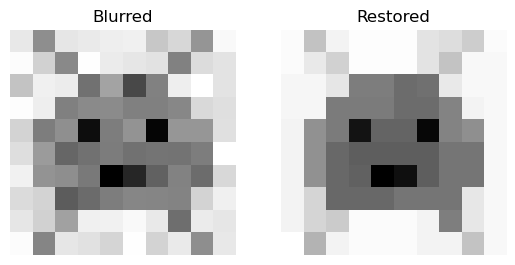

******************************
Davis-yin algorithm 
ℎ(𝑥0) =  510493.10327862983
ℎ(𝑥*) =  92369.83292392116
iterations number:  101
elapsed_time:  0.4418158531188965 seconds
******************************


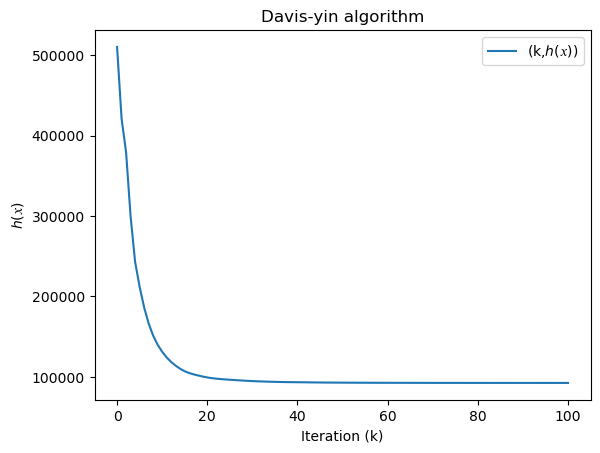

In [32]:
m1,m2 = blurred.shape
n = m1*m2
d =len(blurred[0])
ITER = 0.1*10**(3)
F = build_F(n,d)
b_ = blurred.flatten()
print("Shape F:", F.shape)
gamma = 14
lamda =0.2

# Davis-yin algorithm
func,x,k,elapsed_time= Davis_yin_algorithm(F,b_,lamda,gamma,ITER )
# Plot the first image on the left subplot
plt.subplot(1, 2, 1)
plt.imshow(blurred, cmap = 'gray')
plt.axis("off")
plt.title('Blurred')

# Plot the second image on the right subplot
plt.subplot(1, 2, 2)
plt.imshow(x[:n].reshape(d,d), cmap = 'gray')
plt.title('Restored')
plt.axis("off")
plt.show()
#print(normes6)
print("*" * 30)
print("Davis-yin algorithm ")
print("ℎ(𝑥0) = ",func[0])
print("ℎ(𝑥*) = ",func[-1])
print("iterations number: ",k)
print("elapsed_time: ",elapsed_time,"seconds")
print("*" * 30)
plt.plot( func, label='(k,ℎ($𝑥$))')
plt.title("Davis-yin algorithm")
plt.xlabel('Iteration (k)')
plt.ylabel('ℎ($𝑥$)')
plt.legend()
plt.show()